In [ ]:
!pip install scorecardpy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, roc_auc_score, roc_curve, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import scorecardpy as sc

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hmeq.csv to hmeq.csv


# Reading the csv file

In [ ]:
df = pd.read_csv('hmeq.csv')

### Printing first 10 values of the dataset

In [ ]:
df.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


In [ ]:
print("Shape of dataset",df.shape)
print("Information on number of non-null values and type of data: ", df.info())

Shape of dataset (5960, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB
Information on number of non-null values and type of data:  None


In [ ]:
df.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

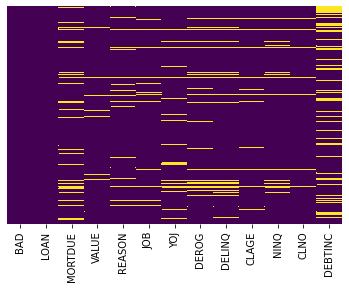

In [ ]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

In [ ]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


### Checking the different number of categories for categorical variables

In [ ]:
print(df["REASON"].value_counts())
print(df["JOB"].value_counts())
print(pd.crosstab(df['REASON'], df['BAD']))
print(pd.crosstab(df['JOB'], df['BAD']))

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64
BAD         0    1
REASON            
DebtCon  3183  745
HomeImp  1384  396
BAD         0    1
JOB               
Mgr       588  179
Office    823  125
Other    1834  554
ProfExe  1064  212
Sales      71   38
Self      135   58


In [ ]:
df.groupby('REASON', as_index=False).agg({'BAD': ["mean"]})

,REASON,BAD
,,mean
0,DebtCon,0.189664
1,HomeImp,0.222472


In [ ]:
df.groupby('JOB', as_index=False).agg({'BAD': ["mean"]})

,JOB,BAD
,,mean
0,Mgr,0.233377
1,Office,0.131857
2,Other,0.231993
3,ProfExe,0.166144
4,Sales,0.348624
5,Self,0.300518


In [ ]:
df = df.drop(columns = ["JOB", "REASON"], axis=1)

In [ ]:
# NORMALIZING

In [ ]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1.0,0.000000,0.059869,0.036590,0.256098,0.0,0.000000,0.080777,0.058824,0.126761,NaN
1,1.0,0.002252,0.171050,0.071234,0.170732,0.0,0.133333,0.104289,0.000000,0.197183,NaN
2,1.0,0.004505,0.028773,0.010261,0.097561,0.0,0.000000,0.127942,0.058824,0.140845,NaN
3,1.0,0.004505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.006757,0.240856,0.122655,0.073171,0.0,0.000000,0.079893,0.000000,0.197183,NaN


In [ ]:
# INVERSE NORMALIZATION

In [ ]:
df = pd.DataFrame(scaler.inverse_transform(df), columns = df.columns)
df.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1.0,1100.0,25860.000000,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,38.428333
1,1.0,1300.0,70053.000000,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,36.070701
2,1.0,1500.0,13500.000000,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,30.021770
3,1.0,1500.0,79343.134542,89235.5,7.0,10.0,15.0,179.766275,0.0,0.0,28.953141
4,0.0,1700.0,97800.000000,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,31.110038


# Handling Missing Values

In [ ]:
df[df['DEBTINC'].notnull()]['BAD'].value_counts()

0    4290
1     403
Name: BAD, dtype: int64

In [ ]:
df[df['DEBTINC'].isnull()]['BAD'].value_counts()

1    786
0    481
Name: BAD, dtype: int64

In [ ]:
df.loc[(df['BAD'] == 1) & (df['DEBTINC'].notnull())]['DEBTINC'].mean()

39.387644892291064

In [ ]:
df.loc[(df['BAD'] == 0) & (df['DEBTINC'].notnull())]['DEBTINC'].mean()

33.25312863402213

In [ ]:
df = df.assign(
    DEBTINC=np.where(df.BAD.eq(1) & df.DEBTINC.isnull(), df.loc[(df['BAD'] == 1) & (df['DEBTINC'].notnull())]['DEBTINC'].mean(), df.DEBTINC)
)

In [ ]:
df = df.assign(
    DEBTINC=np.where(df.BAD.eq(0) & df.DEBTINC.isnull(), df.loc[(df['BAD'] == 0) & (df['DEBTINC'].notnull())]['DEBTINC'].mean(), df.DEBTINC)
)

In [ ]:
df[df['MORTDUE'].notnull()]['BAD'].value_counts()

0    4359
1    1083
Name: BAD, dtype: int64

In [ ]:
df[df['MORTDUE'].isnull()]['BAD'].value_counts()

0    412
1    106
Name: BAD, dtype: int64

In [ ]:
df = df.assign(
    MORTDUE=np.where(df.BAD.eq(1) & df.MORTDUE.isnull(), df.loc[(df['BAD'] == 1) & (df['MORTDUE'].notnull())]['DEBTINC'].mean(), df.MORTDUE)
)

In [ ]:
df[df['BAD'] == 1]["MORTDUE"].mean()

63271.544248153434

In [ ]:
df = df.assign(
    MORTDUE=np.where(df.BAD.eq(0) & df.MORTDUE.isnull(), df.loc[(df['BAD'] == 0) & (df['MORTDUE'].notnull())]['MORTDUE'].mean(), df.MORTDUE)
)

In [ ]:
df[df['BAD'] == 0]["MORTDUE"].mean()

74829.24905482924

In [ ]:
# DELINQ

In [ ]:
df[df['BAD'] == 1]["DELINQ"].value_counts()

0.0     583
1.0     222
2.0     112
3.0      71
4.0      46
5.0      31
6.0      27
7.0      13
8.0       5
11.0      2
10.0      2
13.0      1
12.0      1
15.0      1
Name: DELINQ, dtype: int64

In [ ]:
df[df['BAD'] == 0]["DELINQ"].value_counts()

0.0    3596
1.0     432
2.0     138
3.0      58
4.0      32
5.0       7
Name: DELINQ, dtype: int64

In [ ]:
df = df.assign(
    DELINQ=np.where(df.BAD.eq(1) & df.DELINQ.isnull(), 1, df.DELINQ)
)

In [ ]:
df = df.assign(
    DELINQ=np.where(df.BAD.eq(0) & df.DELINQ.isnull(), 0, df.DELINQ)
)

In [ ]:
df[df['BAD'] == 0]["DEROG"].value_counts()

0.0    3773
1.0     266
2.0      78
3.0      15
5.0       8
6.0       5
4.0       5
Name: DEROG, dtype: int64

In [ ]:
df[df['BAD'] == 1]["DEROG"].mean()

0.7078039927404719

In [ ]:
df = df.assign(
    DEROG=np.where(df.BAD.eq(1) & df.DEROG.isnull(), 1, df.DEROG)
)

In [ ]:
df = df.assign(
    DEROG=np.where(df.BAD.eq(0) & df.DEROG.isnull(), 0, df.DEROG)
)

In [ ]:
imputer = KNNImputer(n_neighbors=3)

In [ ]:
imputer.fit(df)
# transform the dataset
df.iloc[:,:] = imputer.transform(df.iloc[:,:])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   float64
 1   LOAN     5960 non-null   float64
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5960 non-null   float64
 4   YOJ      5960 non-null   float64
 5   DEROG    5960 non-null   float64
 6   DELINQ   5960 non-null   float64
 7   CLAGE    5960 non-null   float64
 8   NINQ     5960 non-null   float64
 9   CLNO     5960 non-null   float64
 10  DEBTINC  5960 non-null   float64
dtypes: float64(11)
memory usage: 512.3 KB


In [ ]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,0.199497,18607.969799,73197.714368,101316.262685,8.910626,0.277125,0.529027,179.150775,1.175559,21.216890,33.163710
std,0.399656,11207.480417,43548.341088,57600.880989,7.421512,0.824264,1.161550,84.448658,1.674929,10.006702,8.300363
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46332.000000,65657.750000,3.000000,0.000000,0.000000,116.096652,0.000000,15.000000,28.171746
50%,0.000000,16300.000000,65014.500000,88654.000000,7.000000,0.000000,0.000000,172.633785,1.000000,20.000000,34.055329
75%,0.000000,23300.000000,90338.416667,119263.000000,13.000000,0.000000,1.000000,228.324085,2.000000,26.000000,38.429706
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [ ]:
#df["REASON"].fillna(df["REASON"].mode()[0],inplace=True)
#df["MORTDUE"].fillna(0,inplace=True)
df["JOB"].fillna(df["JOB"].mode()[0],inplace=True)
#df["DEROG"].fillna(value=0,inplace=True)        
#df["DELINQ"].fillna(value=0,inplace=True)  
df["YOJ"].fillna(df["YOJ"].median(), inplace=True)
df["CLAGE"].fillna(df["CLAGE"].mean(), inplace = True)
df["NINQ"].fillna(0, inplace = True)
df["CLNO"].fillna(0, inplace = True)
#df["DEBTINC"].fillna(df["DEBTINC"].mean(), inplace =True)
df["VALUE"].fillna(df["VALUE"].median(), inplace= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5960 non-null   float64
 4   REASON   5960 non-null   object 
 5   JOB      5960 non-null   object 
 6   YOJ      5960 non-null   float64
 7   DEROG    5960 non-null   float64
 8   DELINQ   5960 non-null   float64
 9   CLAGE    5960 non-null   float64
 10  NINQ     5960 non-null   float64
 11  CLNO     5960 non-null   float64
 12  DEBTINC  5960 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


# Data Analysis 

### Checking the distribution of data

0    4771
1    1189
Name: BAD, dtype: int64


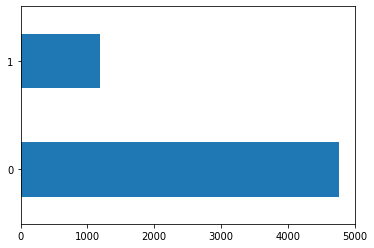

In [ ]:
print(df["BAD"].value_counts())
df["BAD"].value_counts().plot(kind="barh")

### Pairplot - to check change in variable values in pairs

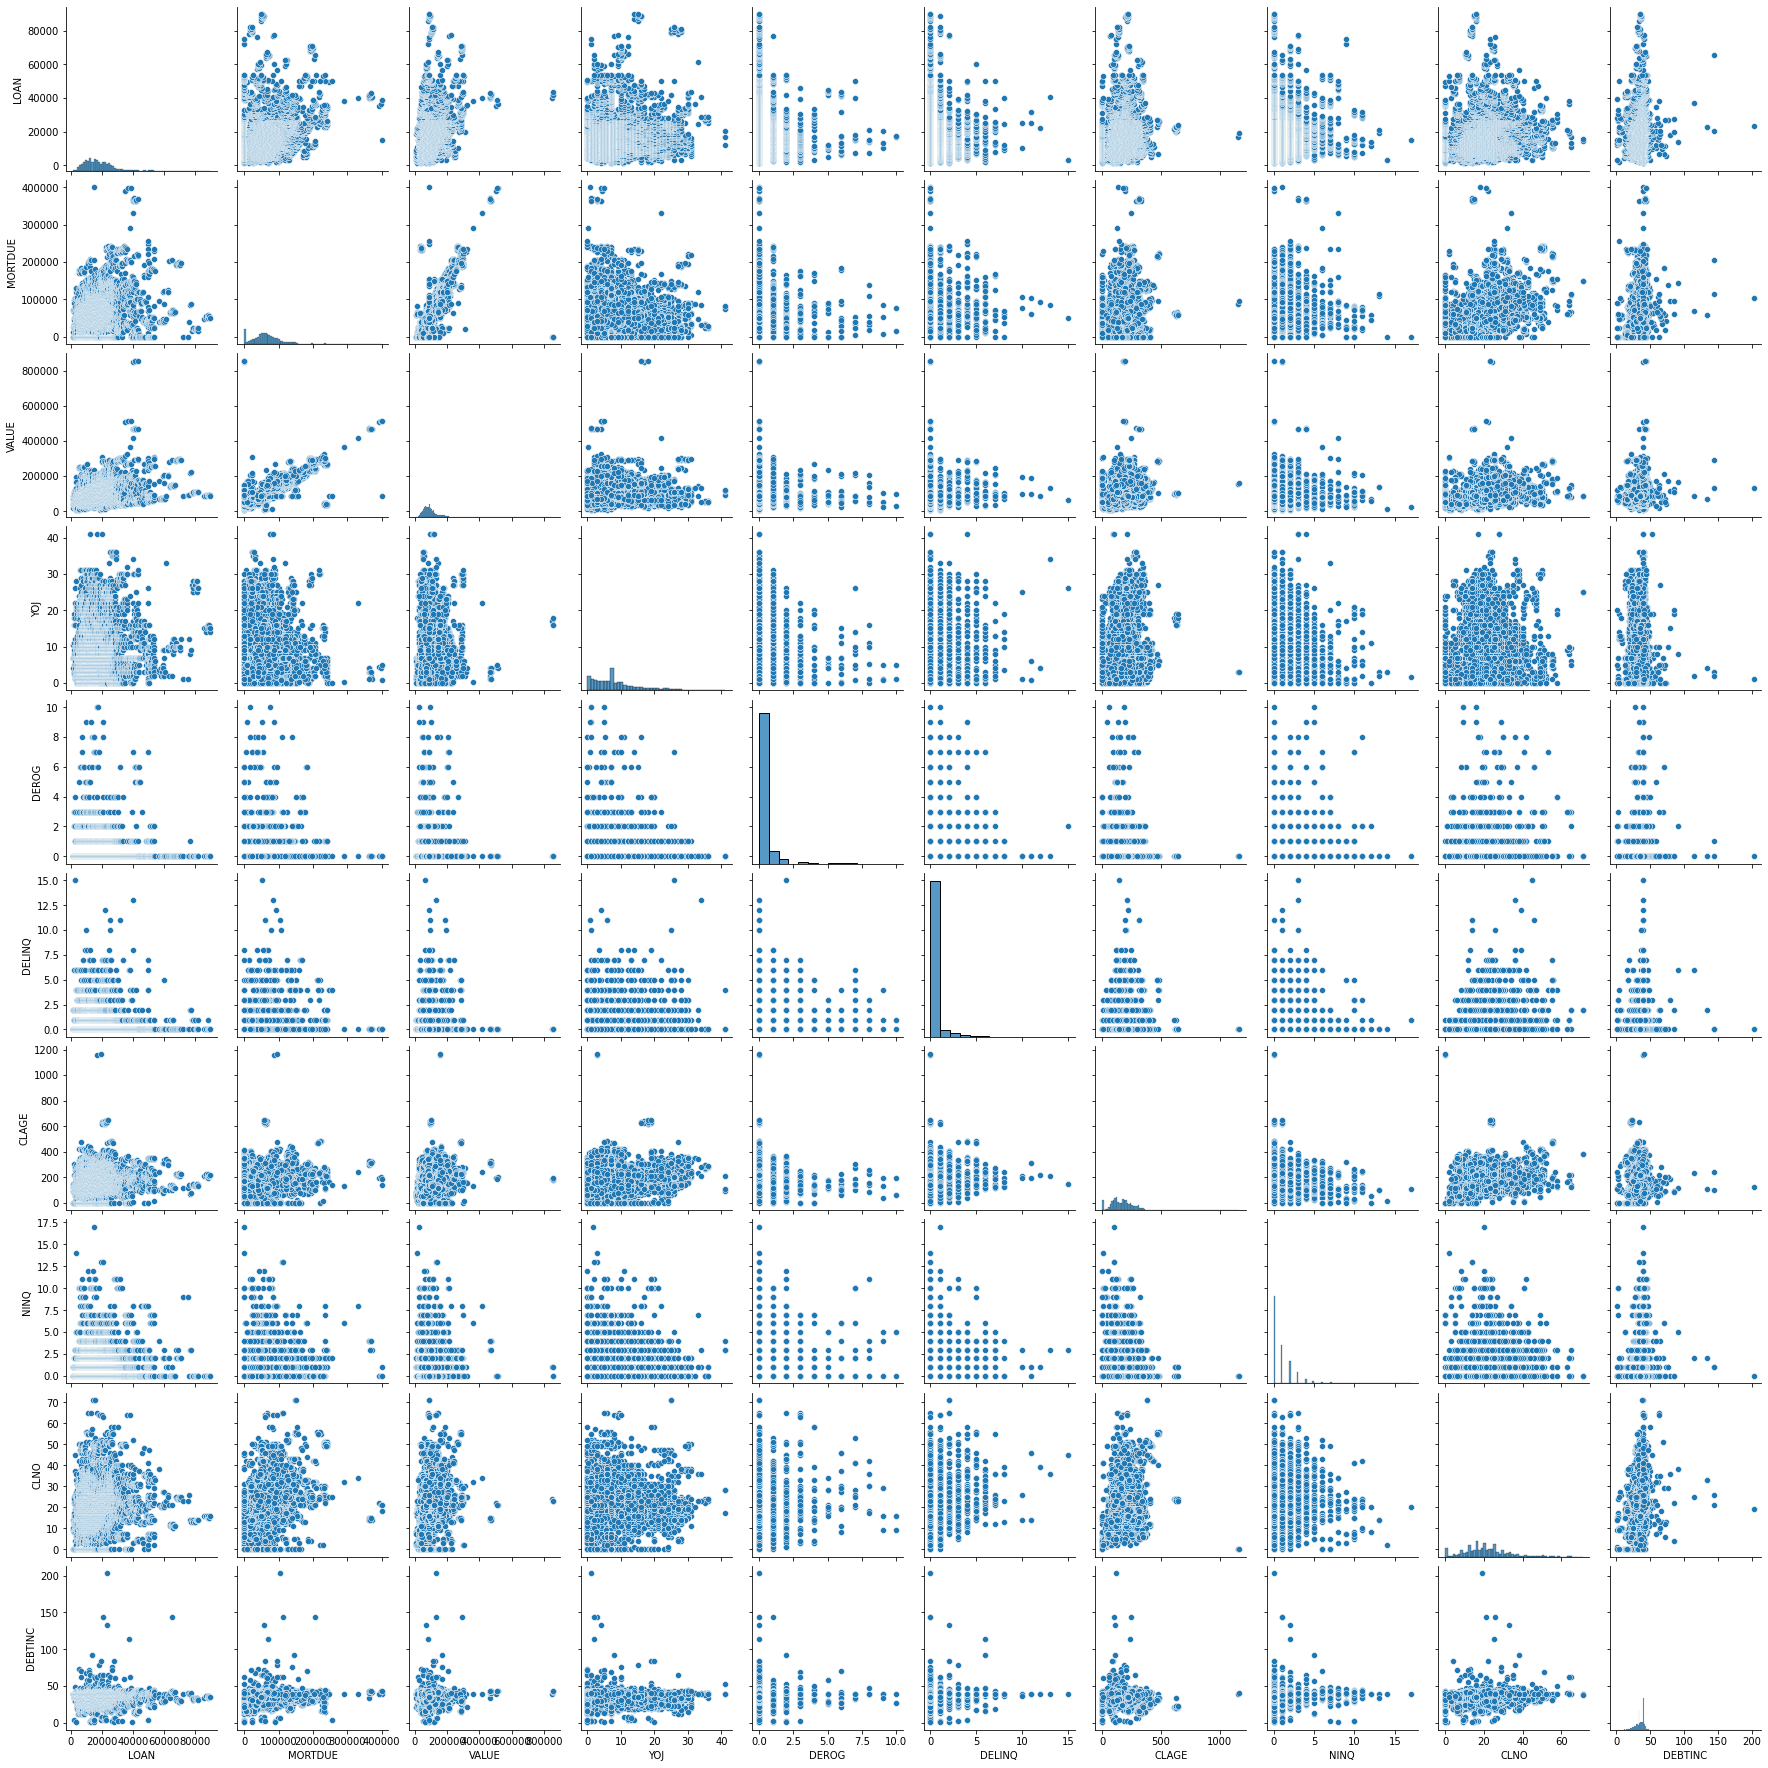

In [ ]:
sns.pairplot(df.iloc[:,1:])

### Comments on the above graphs

## Plotting the distributions of all the numerical features

Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC'],
      dtype='object')


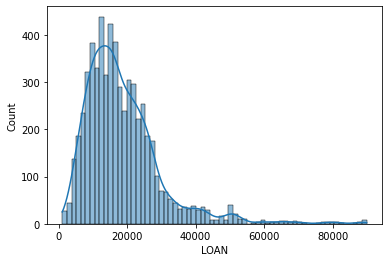

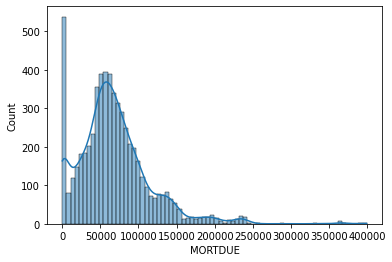

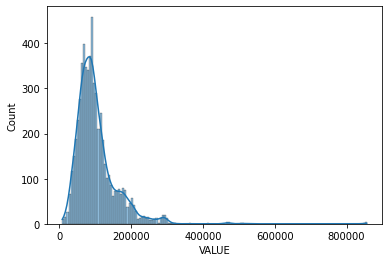

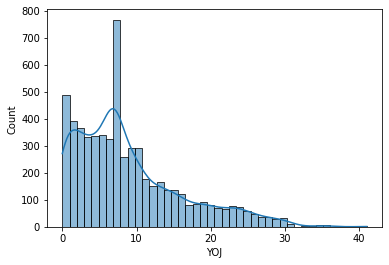

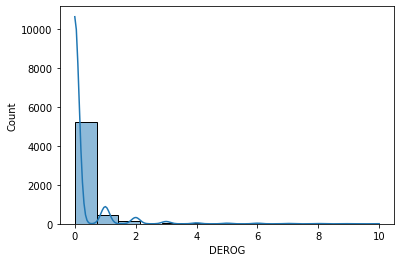

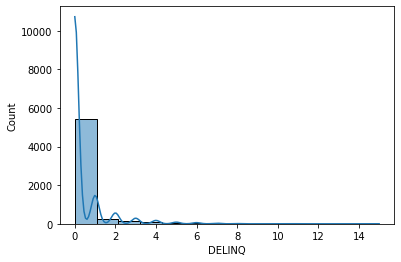

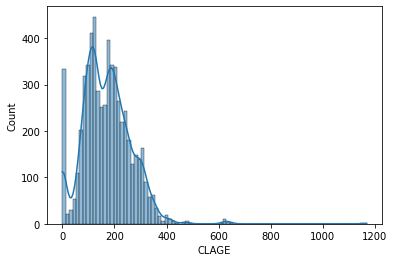

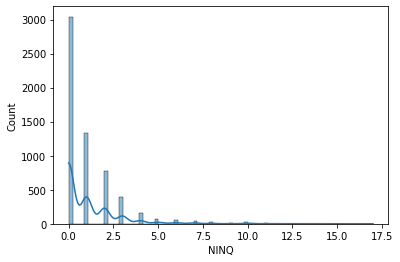

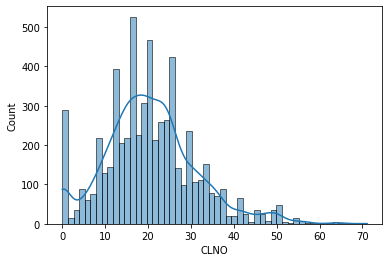

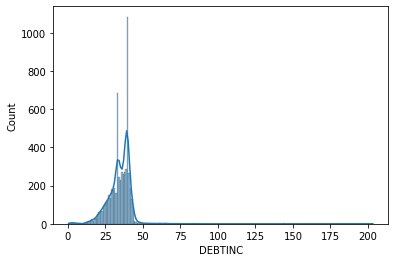

In [ ]:
numeric_columns = df.iloc[:,1:]._get_numeric_data().columns
print(numeric_columns)
for i, var in enumerate(numeric_columns):
    plt.figure(i)
    sns.histplot(df[var], kde = 1)

## Plotting corelation 

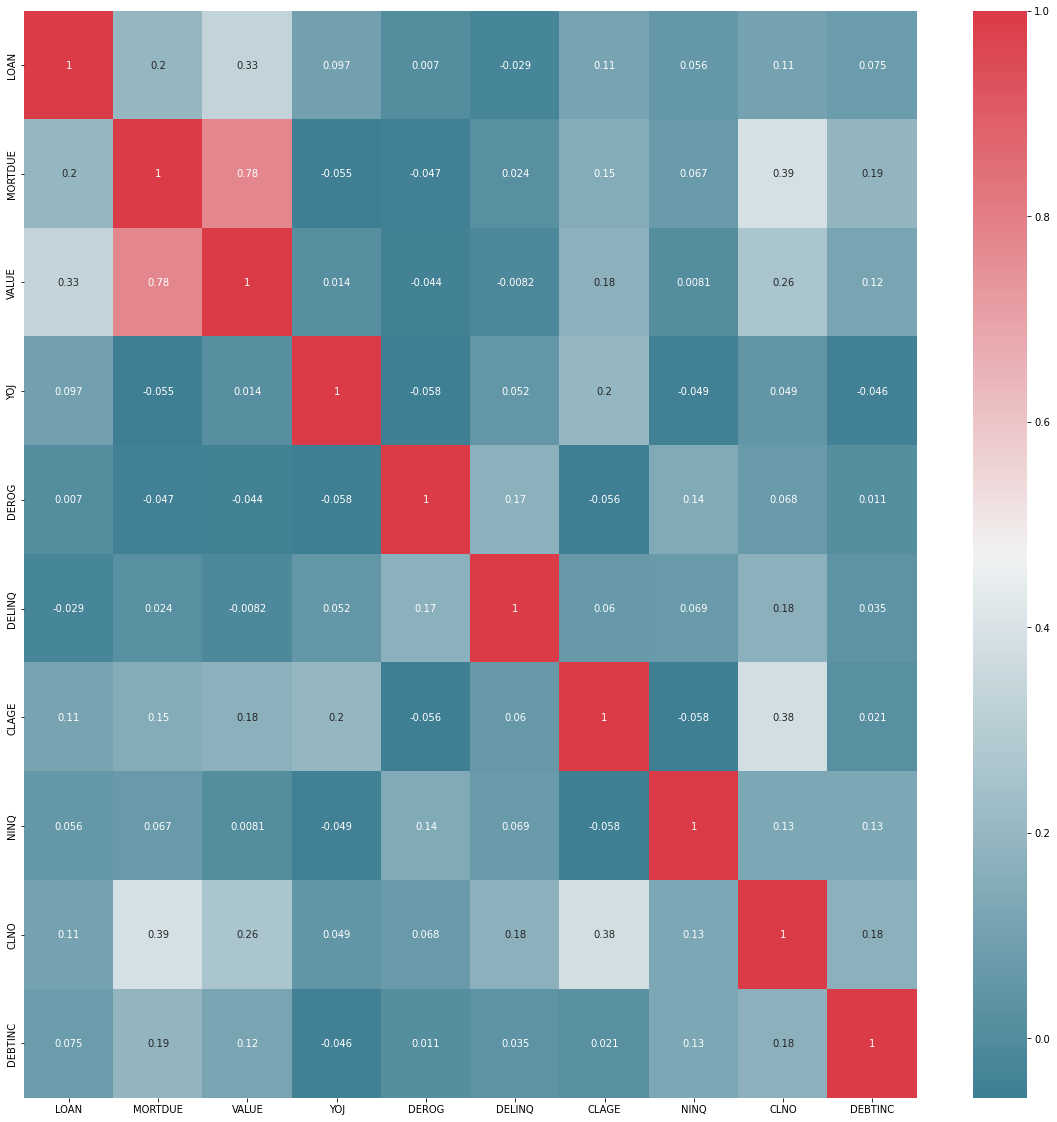

In [ ]:
plt.figure(figsize=(20,20))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[numeric_columns].corr(), cmap = colormap,annot=True)

## Identifying outliers

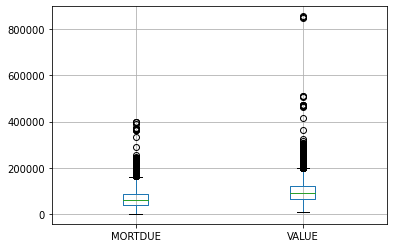

In [ ]:
df.boxplot(column = ["MORTDUE", "VALUE"])

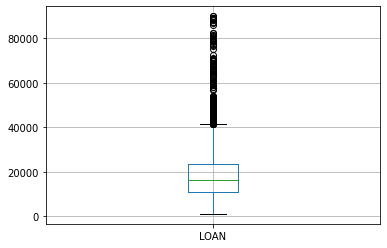

In [ ]:
df.boxplot(column = ["LOAN"])

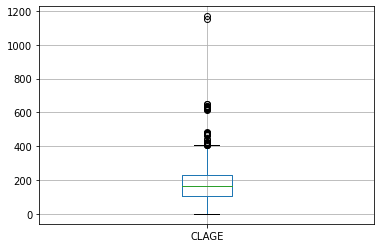

In [ ]:
df.boxplot(column = ["CLAGE"])

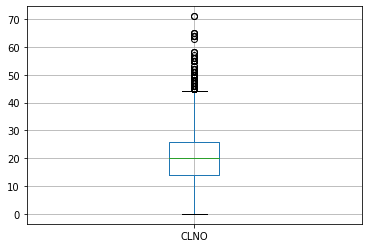

In [ ]:
df.boxplot(column = ["CLNO"])

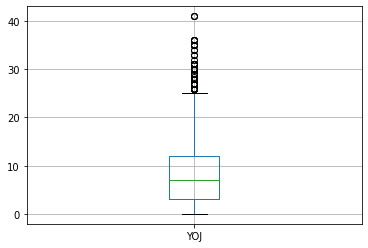

In [ ]:
df.boxplot(column = ["YOJ"])

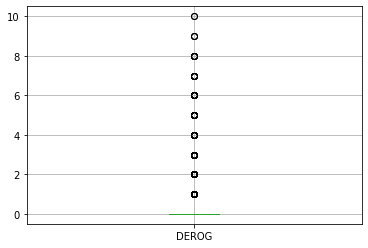

In [ ]:
df.boxplot(column = ["DEROG"])

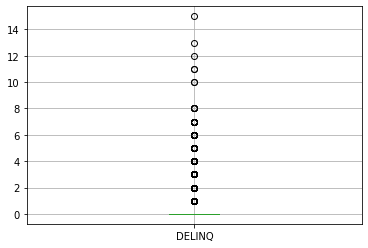

In [ ]:
df.boxplot(column = ["DELINQ"])

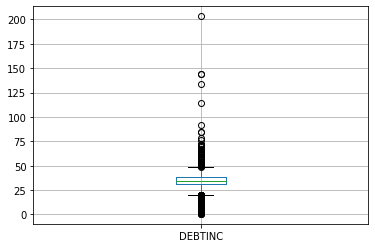

In [ ]:
df.boxplot(column = ["DEBTINC"])

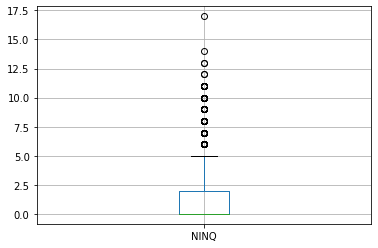

In [ ]:
df.boxplot(column = ["NINQ"])

# Data transformation 

###Outliers handling by using upper cap

In [ ]:
df = df.loc[(df['LOAN'] < 50000) & (df['MORTDUE']< 200000) & (df['DEBTINC'] > 20)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4927 entries, 0 to 5806
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      4927 non-null   int64  
 1   LOAN     4927 non-null   int64  
 2   MORTDUE  4927 non-null   float64
 3   VALUE    4927 non-null   float64
 4   REASON   4927 non-null   object 
 5   JOB      4927 non-null   object 
 6   YOJ      4927 non-null   float64
 7   DEROG    4927 non-null   float64
 8   DELINQ   4927 non-null   float64
 9   CLAGE    4927 non-null   float64
 10  NINQ     4927 non-null   float64
 11  CLNO     4927 non-null   float64
 12  DEBTINC  4927 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 538.9+ KB


Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC'],
      dtype='object')


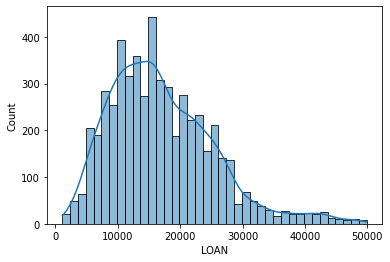

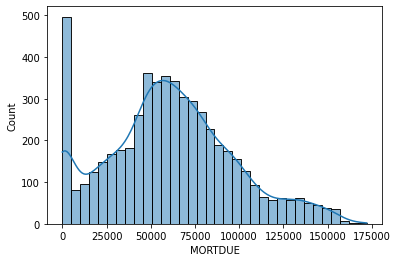

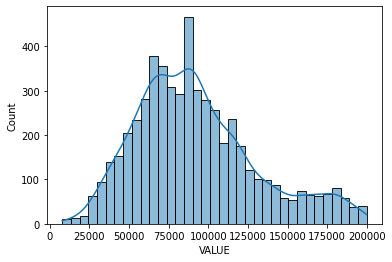

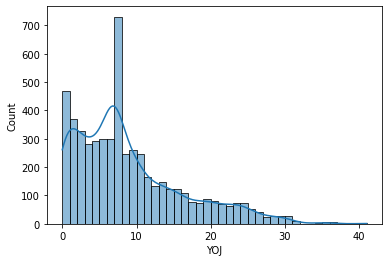

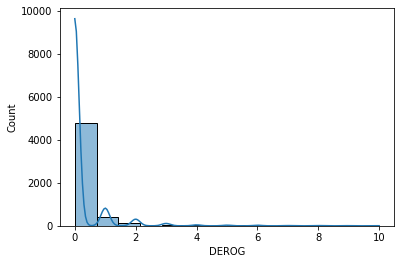

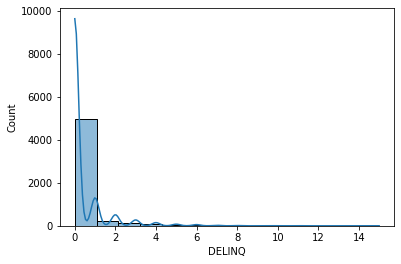

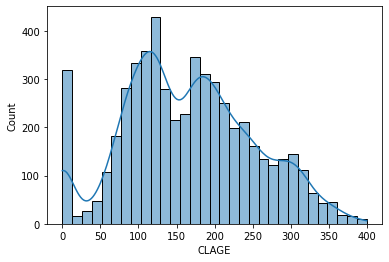

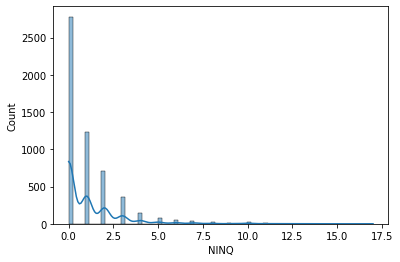

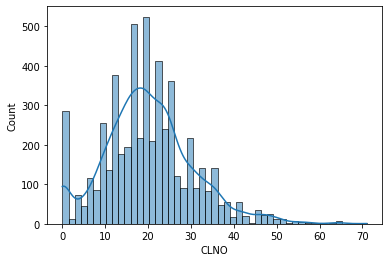

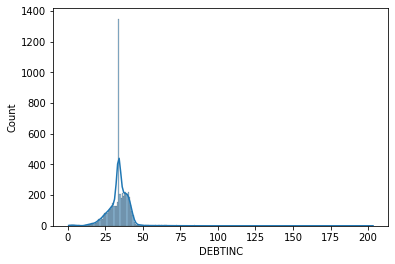

In [ ]:
numeric_columns = df.iloc[:,1:]._get_numeric_data().columns
print(numeric_columns)
for i, var in enumerate(numeric_columns):
    plt.figure(i)
    sns.histplot(df[var], kde = 1)

0    4348
1    1099
Name: BAD, dtype: int64


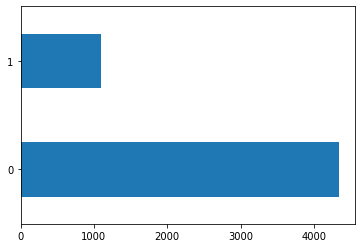

In [ ]:
print(df["BAD"].value_counts())
df["BAD"].value_counts().plot(kind="barh")

###LABEL ENCODING

In [ ]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['JOB'] = labelencoder.fit_transform(df['JOB'])
df['JOB']

0       2
1       2
2       2
3       2
4       1
       ..
5801    1
5802    5
5804    2
5805    5
5806    5
Name: JOB, Length: 5518, dtype: int64

In [ ]:
df['REASON'] = labelencoder.fit_transform(df['REASON'])

### Train Test split

In [ ]:
train, test = sc.split_df(df,
                          y = 'BAD',
                          ratio = 0.7, seed = 32734417).values()

In [ ]:
train.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.000000,39025.0,1,2,10.5,0.0,0.0,94.366667,1.0,9.0,39.387645
2,1,1500,13500.000000,16700.0,1,2,4.0,0.0,0.0,149.466667,1.0,10.0,39.387645
4,0,1700,97800.000000,112000.0,1,1,3.0,0.0,0.0,93.333333,0.0,14.0,33.253129
6,1,1800,48649.000000,57037.0,1,2,5.0,3.0,2.0,77.100000,1.0,17.0,39.387645
7,1,1800,28502.000000,43034.0,1,2,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.000000,46740.0,1,2,3.0,0.0,2.0,216.933333,1.0,12.0,39.387645
9,1,2000,39.580576,62250.0,1,4,16.0,0.0,0.0,115.800000,0.0,13.0,39.387645
10,1,2000,22608.000000,89235.5,0,2,18.0,1.0,1.0,179.766275,0.0,0.0,39.387645
11,1,2000,20627.000000,29800.0,1,1,11.0,0.0,1.0,122.533333,1.0,9.0,39.387645
12,1,2000,45000.000000,55000.0,1,2,3.0,0.0,0.0,86.066667,2.0,25.0,39.387645


In [ ]:
train.describe()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000
mean,0.204039,17133.997929,69045.122460,97383.589902,0.295961,1.909114,8.857807,0.237960,0.409891,178.026878,1.105127,20.540394,35.153394
std,0.403050,8504.062531,35663.266046,51332.506456,0.456532,1.087603,7.368895,0.806975,1.067781,83.547134,1.707072,10.584317,6.579883
min,0.000000,1100.000000,39.580576,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.486711,0.000000,0.000000,20.010324
25%,0.000000,10800.000000,46071.500000,65970.000000,0.000000,1.000000,3.000000,0.000000,0.000000,116.707436,0.000000,14.000000,31.760365
50%,0.000000,15800.000000,66745.500000,88931.500000,0.000000,2.000000,7.000000,0.000000,0.000000,175.929025,0.000000,20.000000,35.937349
75%,0.000000,22300.000000,86147.000000,116676.250000,1.000000,3.000000,13.000000,0.000000,0.000000,224.459286,2.000000,26.000000,39.387645
max,1.000000,49900.000000,199232.000000,855909.000000,1.000000,5.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,143.949605


In [ ]:
bins = sc.woebin(train, y = 'BAD', 
                 min_perc_fine_bin=0.01, # initial binning
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.1, # Minimum information value 
                 max_num_bin =6, # Maximum number of bins
                 method='tree')

[INFO] creating woe binning ...
Binning on 3862 rows and 13 columns in 00:00:16


{'CLAGE': <Figure size 432x288 with 2 Axes>,
 'CLNO': <Figure size 432x288 with 2 Axes>,
 'DEBTINC': <Figure size 432x288 with 2 Axes>,
 'DELINQ': <Figure size 432x288 with 2 Axes>,
 'DEROG': <Figure size 432x288 with 2 Axes>,
 'JOB': <Figure size 432x288 with 2 Axes>,
 'LOAN': <Figure size 432x288 with 2 Axes>,
 'MORTDUE': <Figure size 432x288 with 2 Axes>,
 'NINQ': <Figure size 432x288 with 2 Axes>,
 'REASON': <Figure size 432x288 with 2 Axes>,
 'VALUE': <Figure size 432x288 with 2 Axes>,
 'YOJ': <Figure size 432x288 with 2 Axes>}

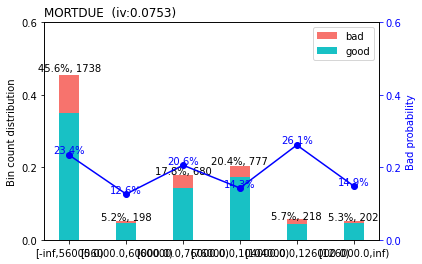

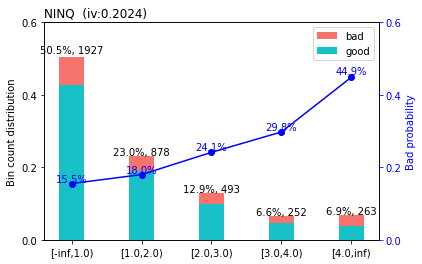

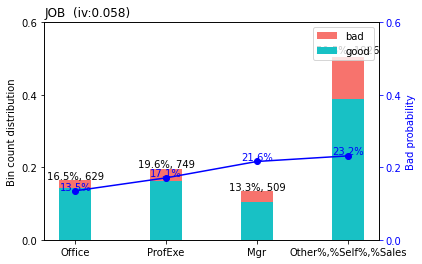

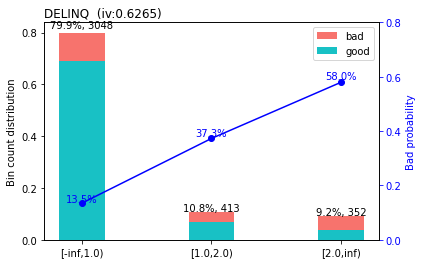

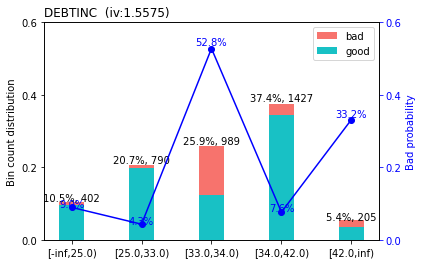

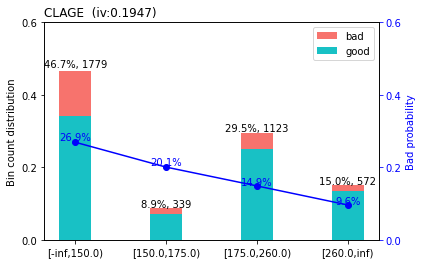

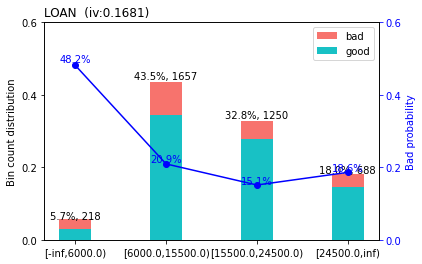

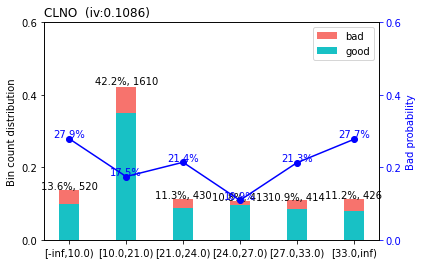

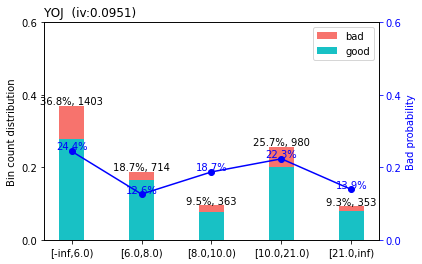

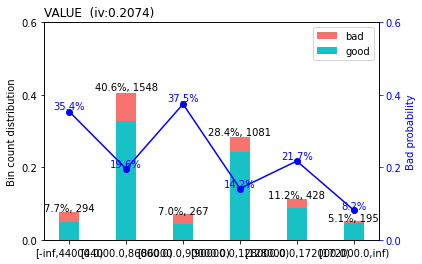

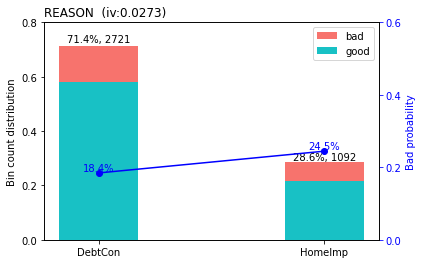

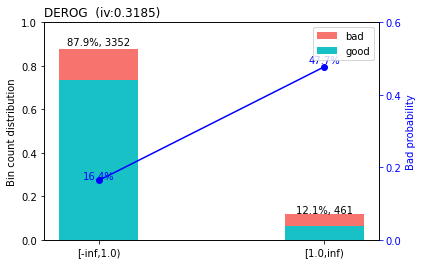

In [ ]:
sc.woebin_plot(bins)

In [ ]:
df["JOB"].value_counts()

Other      2533
ProfExe    1061
Office      909
Mgr         726
Self        126
Sales        92
Name: JOB, dtype: int64

In [ ]:
# grouping categories in job

#df["JOB_MODIFIED"] = df["JOB"].replace({"Office":"ProfExe"})
#df["JOB_MODIFIED"] = df["JOB_MODIFIED"].replace({"Mgr":"Other"})


In [ ]:
#df["JOB_MODIFIED"] = df["JOB_MODIFIED"].replace({"Self":"Other"})
#df["JOB_MODIFIED"] = df["JOB_MODIFIED"].replace({"Sales":"Other"})

In [ ]:
#df["JOB_MODIFIED"].value_counts()
#df.drop("JOB",axis =1)

,BAD,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,JOB_MODIFIED
0,1,1100,25860.0,39025.0,HomeImp,10.5,0.0,0.0,94.366667,1.0,9.0,33.779915,Other
1,1,1300,70053.0,68400.0,HomeImp,7.0,0.0,2.0,121.833333,0.0,14.0,33.779915,Other
2,1,1500,13500.0,16700.0,HomeImp,4.0,0.0,0.0,149.466667,1.0,10.0,33.779915,Other
3,1,1500,0.0,89235.5,DebtCon,7.0,0.0,0.0,0.000000,0.0,0.0,33.779915,Other
4,0,1700,97800.0,112000.0,HomeImp,3.0,0.0,0.0,93.333333,0.0,14.0,33.779915,ProfExe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,0,48400,33300.0,60000.0,DebtCon,5.0,1.0,0.0,193.366667,1.0,16.0,33.779915,ProfExe
5799,0,48900,33903.0,68995.0,DebtCon,6.0,0.0,0.0,204.452117,1.0,16.0,30.999236,ProfExe
5801,0,49200,40694.0,69777.0,DebtCon,3.0,1.0,0.0,205.104882,0.0,16.0,30.214904,ProfExe
5802,0,49300,40724.0,102546.0,HomeImp,6.0,0.0,0.0,211.449314,1.0,36.0,39.037679,Other


In [ ]:
train, test = sc.split_df(df,
                          y = 'BAD',
                          ratio = 0.7, seed = 32734417).values()

[INFO] creating woe binning ...


{'CLAGE': <Figure size 432x288 with 2 Axes>,
 'CLNO': <Figure size 432x288 with 2 Axes>,
 'DEBTINC': <Figure size 432x288 with 2 Axes>,
 'DELINQ': <Figure size 432x288 with 2 Axes>,
 'DEROG': <Figure size 432x288 with 2 Axes>,
 'JOB': <Figure size 432x288 with 2 Axes>,
 'LOAN': <Figure size 432x288 with 2 Axes>,
 'MORTDUE': <Figure size 432x288 with 2 Axes>,
 'NINQ': <Figure size 432x288 with 2 Axes>,
 'REASON': <Figure size 432x288 with 2 Axes>,
 'VALUE': <Figure size 432x288 with 2 Axes>,
 'YOJ': <Figure size 432x288 with 2 Axes>}

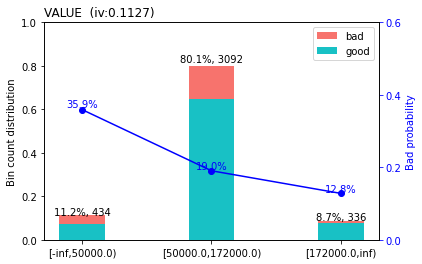

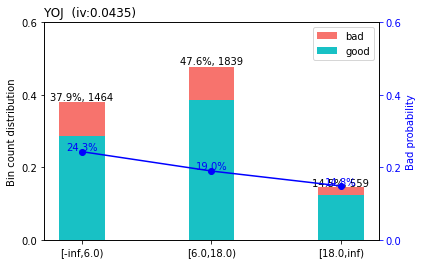

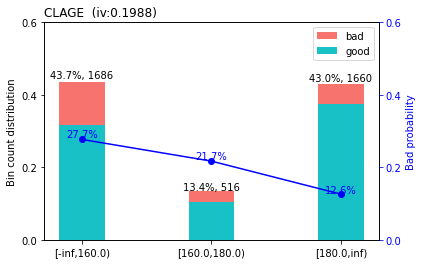

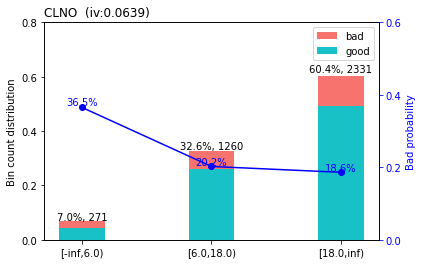

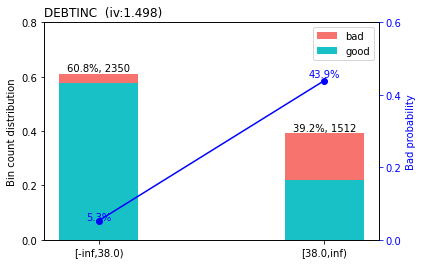

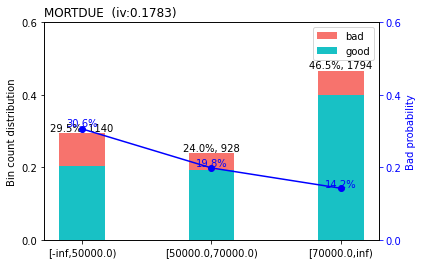

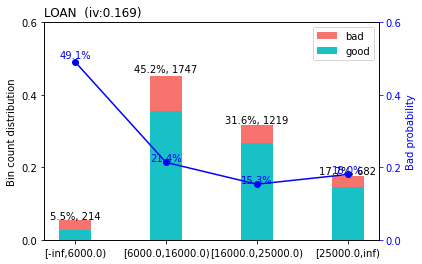

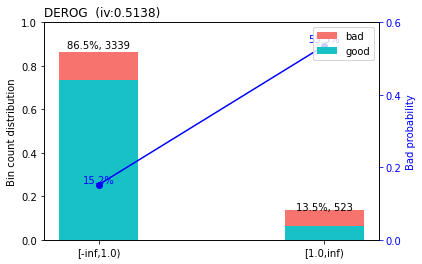

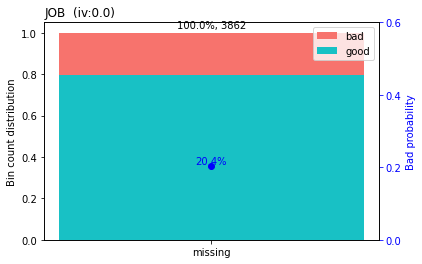

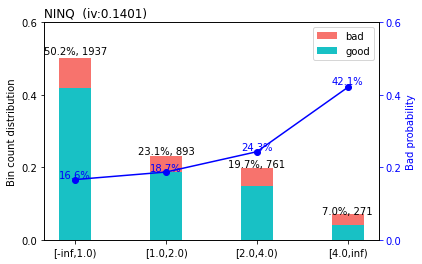

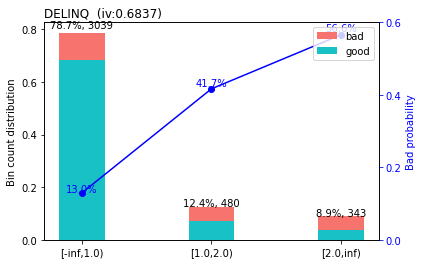

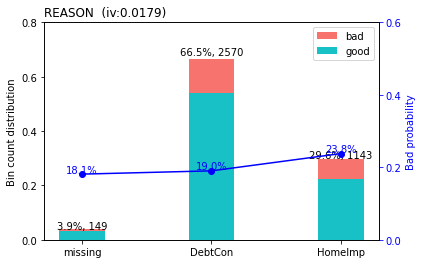

In [ ]:
breaks_adj = {
    'CLNO': [6.0, 18.0],
    'YOJ': [6.0, 18.0],
    'VALUE': [50000.0, 172000.0],
    'DEBTINC': [38],
    'LOAN': [6000.0,16000.0,25000.0],
    'MORTDUE': [50000, 70000],
    'CLAGE': [160,180],
    'JOB': [2,3]
}
bins_adj = sc.woebin(train, y="BAD", breaks_list=breaks_adj)
sc.woebin_plot(bins_adj)

In [ ]:
train_woe = sc.woebin_ply(train, bins_adj)
test_woe = sc.woebin_ply(test, bins_adj)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [ ]:
train_woe.head()

,BAD,VALUE_woe,YOJ_woe,CLAGE_woe,CLNO_woe,DEBTINC_woe,MORTDUE_woe,LOAN_woe,DEROG_woe,JOB_woe,NINQ_woe,DELINQ_woe,REASON_woe
0,1,0.783472,-0.090223,0.40178,-0.010242,1.116638,0.543011,1.323849,-0.356667,NaN,-0.108319,-0.542839,0.197397
2,1,0.783472,0.225856,0.40178,-0.010242,1.116638,0.543011,1.323849,-0.356667,NaN,-0.108319,-0.542839,0.197397
4,0,-0.085582,0.225856,0.40178,-0.010242,-1.526443,-0.436388,1.323849,-0.356667,NaN,-0.251302,-0.542839,0.197397
6,1,-0.085582,0.225856,0.40178,-0.010242,1.116638,0.543011,1.323849,1.502965,NaN,-0.108319,1.625149,0.197397
7,1,0.783472,-0.090223,0.40178,-0.010242,-1.526443,0.543011,1.323849,-0.356667,NaN,-0.251302,-0.542839,0.197397


###IV Filtering###

In [ ]:
sc.iv(train_woe, 'BAD')

,variable,info_value
5,DEBTINC_woe,1.498039
7,DELINQ_woe,0.683740
3,DEROG_woe,0.513779
11,CLAGE_woe,0.198827
0,MORTDUE_woe,0.178335
4,LOAN_woe,0.169044
8,NINQ_woe,0.140103
1,VALUE_woe,0.112691
6,CLNO_woe,0.063944
9,YOJ_woe,0.043482


In [ ]:
train_woe.columns

Index(['BAD', 'VALUE_woe', 'YOJ_woe', 'CLAGE_woe', 'CLNO_woe', 'DEBTINC_woe',
       'MORTDUE_woe', 'LOAN_woe', 'DEROG_woe', 'JOB_woe', 'NINQ_woe',
       'DELINQ_woe', 'REASON_woe'],
      dtype='object')

In [ ]:
train_woe_adj = train_woe.drop([ 'YOJ_woe', 'CLNO_woe', 'REASON_woe', 'JOB_woe'], axis=1)
test_woe_adj = test_woe.drop([ 'YOJ_woe', 'CLNO_woe', 'REASON_woe', 'JOB_woe'], axis = 1)
train_woe_adj.columns

Index(['BAD', 'VALUE_woe', 'CLAGE_woe', 'DEBTINC_woe', 'MORTDUE_woe',
       'LOAN_woe', 'DEROG_woe', 'NINQ_woe', 'DELINQ_woe'],
      dtype='object')

In [ ]:
test_woe_adj.head()

,BAD,VALUE_woe,CLAGE_woe,DEBTINC_woe,MORTDUE_woe,LOAN_woe,DEROG_woe,NINQ_woe,DELINQ_woe
1,1,-0.085582,0.401780,1.116638,-0.436388,1.323849,-0.356667,-0.251302,1.625149
3,1,-0.085582,0.078321,1.116638,0.543011,1.323849,1.502965,-0.251302,1.024765
5,1,0.783472,0.401780,-1.526443,0.543011,1.323849,-0.356667,-0.108319,-0.542839
13,0,-0.085582,0.401780,-1.526443,-0.035868,1.323849,-0.356667,-0.251302,-0.542839
16,1,-0.085582,0.401780,1.116638,-0.436388,1.323849,1.502965,-0.108319,1.625149


# Running a basic model  

## Spliting data into train and test

In [ ]:
credit_model_logreg = LogisticRegression(penalty='l1', #  l1 = lasso, 
                                     tol=0.0001, # Tolerance for parameters
                                     C=1.0, # Penalty constant, see below
                                     fit_intercept=True, 
                                     class_weight='balanced', # Weights, see below
                                     random_state=32734417, # Random seed
                                     max_iter=1000, # Maximum iterations
                                     verbose=1, 
                                     solver = 'saga',
                                     warm_start=False 
                                    )

In [ ]:
credit_model_logreg.fit(X = train_woe_adj.iloc[:, 1:], y = train_woe_adj['BAD'])

convergence after 22 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=32734417, solver='saga', verbose=1)

In [ ]:
y_prediction = credit_model_logreg.predict(test_woe_adj.iloc[:,1:])

prob_test = credit_model_logreg.predict_proba(test_woe_adj.iloc[:,1:])

print(y_prediction, prob_test)

[1 1 1 ... 1 0 1] [[0.04413266 0.95586734]
 [0.01534604 0.98465396]
 [0.49217361 0.50782639]
 ...
 [0.47179584 0.52820416]
 [0.51697448 0.48302552]
 [0.47179584 0.52820416]]


In [ ]:
accuracy_score(y_prediction, test_woe_adj['BAD'])

0.8315217391304348

In [ ]:
print("")

score = credit_model_logreg.score(test_woe_adj.iloc[:,1:], test_woe_adj['BAD'])

print("model score : ",score)



model score :  0.8315217391304348


In [ ]:
confusion_matrix(y_true= test_woe_adj['BAD'], y_pred=y_prediction)

array([[1100,  218],
       [  61,  277]])

In [ ]:
print(classification_report(test_woe_adj['BAD'], y_prediction))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      1318
           1       0.56      0.82      0.67       338

    accuracy                           0.83      1656
   macro avg       0.75      0.83      0.78      1656
weighted avg       0.87      0.83      0.84      1656



In [ ]:
roc_auc_score(y_true=test_woe_adj['BAD'], y_score=prob_test[:,1:])

0.904137971285164

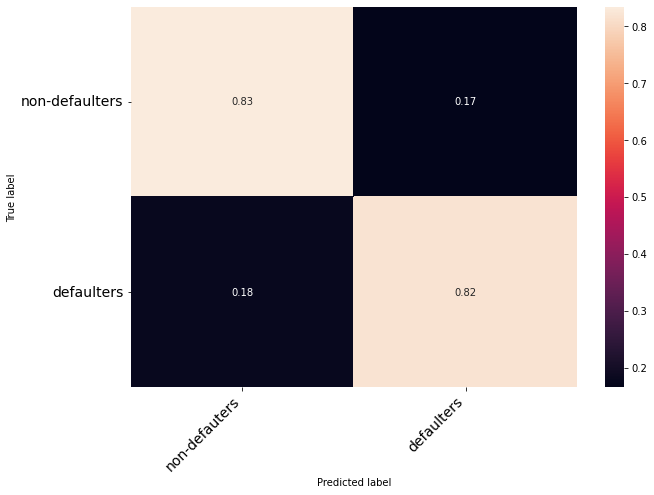

In [ ]:
# Calculate confusion matrix
confusion_matrix_rf = confusion_matrix(y_true = test_woe_adj['BAD'], 
                    y_pred = y_prediction)

# Turn matrix to percentages
confusion_matrix_rf = confusion_matrix_rf.astype('float') / confusion_matrix_rf.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_rf, index=['non-defaulters', 'defaulters'], columns=['non-defauters', 'defaulters'], 
)

# Parameters of the image
figsize = (10,7)
fontsize=14

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, 
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()

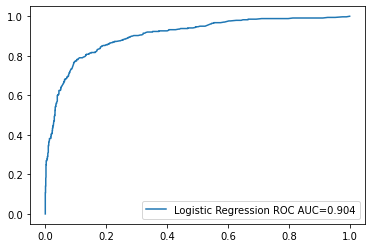

In [ ]:

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(test_woe['BAD'], prob_test[:,1])

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true=test_woe_adj['BAD'], y_score=prob_test[:,1:]),
              decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="Logistic Regression, ROC AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
credit_model_logreg.coef_

array([[0.87752414, 0.86498125, 0.88465199, 0.94655692, 0.88238196,
        0.81209585]])

In [ ]:
importance = credit_model_logreg.coef_[0]

In [ ]:
importance

array([0.87752414, 0.86498125, 0.88465199, 0.94655692, 0.88238196,
       0.81209585])

In [ ]:
columns = train_woe_adj.iloc[:,1:].columns

In [ ]:
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (columns[i],v))

Feature: LOAN_woe, Score: 0.87752
Feature: NINQ_woe, Score: 0.86498
Feature: MORTDUE_woe, Score: 0.88465
Feature: CLAGE_woe, Score: 0.94656
Feature: DELINQ_woe, Score: 0.88238
Feature: DEROG_woe, Score: 0.81210


###Scorecard

In [ ]:
bankloan_sc = sc.scorecard(bins_adj, credit_model_logreg, 
             train_woe_adj.columns[1:], # The column names in the trained LR
             points0=850, # Base points
             odds0=0.01, # Base odds
             pdo=50) # PDO 

In [ ]:
bankloan_sc

{'CLAGE':   variable            bin  points
 6    CLAGE   [-inf,160.0)   -30.0
 7    CLAGE  [160.0,180.0)    -6.0
 8    CLAGE    [180.0,inf)    43.0, 'DEBTINC':    variable          bin  points
 12  DEBTINC  [-inf,38.0)   104.0
 13  DEBTINC   [38.0,inf)   -76.0, 'DELINQ':    variable         bin  points
 28   DELINQ  [-inf,1.0)    35.0
 29   DELINQ   [1.0,2.0)   -66.0
 30   DELINQ   [2.0,inf)  -104.0, 'DEROG':    variable         bin  points
 21    DEROG  [-inf,1.0)    17.0
 22    DEROG   [1.0,inf)   -73.0, 'LOAN':    variable                bin  points
 17     LOAN      [-inf,6000.0)   -63.0
 18     LOAN   [6000.0,16000.0)    -3.0
 19     LOAN  [16000.0,25000.0)    17.0
 20     LOAN      [25000.0,inf)     7.0, 'MORTDUE':    variable                bin  points
 14  MORTDUE     [-inf,50000.0)   -28.0
 15  MORTDUE  [50000.0,70000.0)     2.0
 16  MORTDUE      [70000.0,inf)    23.0, 'NINQ':    variable         bin  points
 24     NINQ  [-inf,1.0)    10.0
 25     NINQ   [1.0,2.0)     4.0
 2

In [ ]:
# Applying the credit score. Applies over the original data!
train_score = sc.scorecard_ply(train, bankloan_sc, 
                               print_step=0)
test_score = sc.scorecard_ply(test, bankloan_sc, 
                               print_step=0)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [ ]:
train_score.describe()

,score
count,3862.000000
mean,576.226049
std,138.773418
min,94.000000
25%,487.000000
50%,604.000000
75%,689.750000
max,793.000000


In [ ]:
train_score.head(10)

,score
0,336.0
2,336.0
4,616.0
6,150.0
7,522.0
8,270.0
9,385.0
10,218.0
11,235.0
12,366.0


### Random Forest Classifier

In [ ]:
bankloan_rf = RandomForestClassifier(n_estimators=1000,
                       criterion='gini', 
                       max_depth=None, 
                       min_samples_split=2, 
                       min_samples_leaf=0.001,
                       min_weight_fraction_leaf=0.0,
                       max_features='auto', 
                       max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, 
                       bootstrap=True, 
                       oob_score=True,  
                       n_jobs=-1, 
                       random_state=32734417, # Seed
                       verbose=1, 
                       warm_start=False, 
                       class_weight='balanced'
                                    )

In [ ]:

df_edited =pd.get_dummies(df)

In [ ]:
df_edited.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.000000,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,39.387645,0,1,0,0,1,0,0,0
1,1,1300,70053.000000,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,39.387645,0,1,0,0,1,0,0,0
2,1,1500,13500.000000,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,39.387645,0,1,0,0,1,0,0,0
3,1,1500,39.580576,89235.5,7.0,1.0,1.0,179.766275,0.0,0.0,39.387645,0,0,0,0,1,0,0,0
4,0,1700,97800.000000,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,33.253129,0,1,0,1,0,0,0,0


In [ ]:
train_noWoE, test_noWoE = sc.split_df(df_edited, y = 'BAD', ratio = 0.7, seed = 32734417).values()

In [ ]:
bankloan_rf.fit(train_noWoE.iloc[:,1:], 
               train_noWoE['BAD'])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.4s finished


RandomForestClassifier(class_weight='balanced', min_impurity_decrease=0.0001,
                       min_samples_leaf=0.001, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=20190305, verbose=1)

In [ ]:
rf_pred_class_test = bankloan_rf.predict(test_noWoE.iloc[:, 1:])
rf_probs_test = bankloan_rf.predict_proba(test_noWoE.iloc[:, 1:])

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.4s finished


In [ ]:
accuracy_score(rf_pred_class_test, test_noWoE['BAD'])

0.9601449275362319

In [ ]:
confusion_matrix(y_true= test_noWoE['BAD'], y_pred=rf_pred_class_test)

array([[1304,   14],
       [  52,  286]])

In [ ]:
print(classification_report(test_noWoE['BAD'], rf_pred_class_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1318
           1       0.95      0.85      0.90       338

    accuracy                           0.96      1656
   macro avg       0.96      0.92      0.94      1656
weighted avg       0.96      0.96      0.96      1656



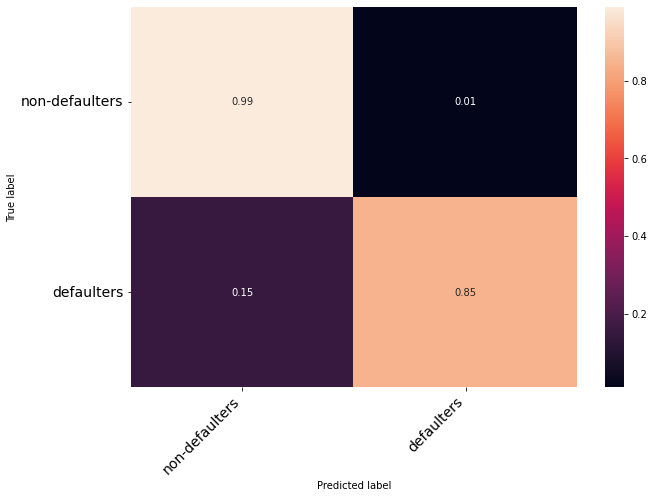

In [ ]:
# Calculate confusion matrix
confusion_matrix_rf = confusion_matrix(y_true = test_noWoE['BAD'], 
                    y_pred = rf_pred_class_test)

# Turn matrix to percentages
confusion_matrix_rf = confusion_matrix_rf.astype('float') / confusion_matrix_rf.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_rf, index=['non-defaulters', 'defaulters'], columns=['non-defaulters', 'defaulters'], 
)

# Parameters of the image
figsize = (10,7)
fontsize=14

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, 
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()

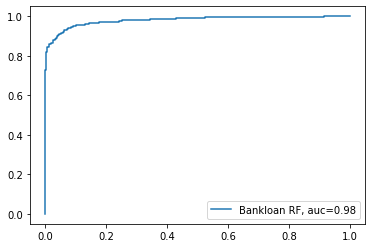

In [ ]:
# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(test_noWoE['BAD'], rf_probs_test[:,1])

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = test_noWoE['BAD'], 
                             y_score = rf_probs_test[:,1]),
              decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="Bankloan RF, auc="+str(auc))
plt.legend(loc=4)
plt.show()

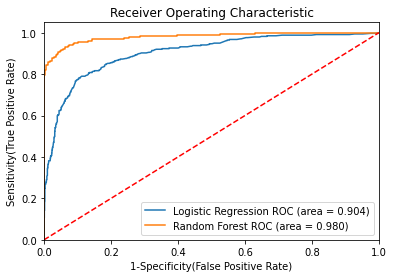

In [ ]:
# Set models and probabilities. This structure is called a dictionary.
models = [
{
    'label': 'Logistic Regression',
    'probs': prob_test[:,1]
},
{
    'label': 'Random Forest',
    'probs': rf_probs_test[:,1]
}
]

# Loop that creates the plot. I will pass each ROC curve one by one.
for m in models:
  auc = roc_auc_score(y_true = test_noWoE['BAD'], 
                             y_score = m['probs'])
  fpr, tpr, thresholds = roc_curve(test_woe_adj['BAD'], 
                                           m['probs'])
  plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (m['label'], auc))
                 

    
# Settings
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
    
# Plot!    
plt.show()

In [ ]:
importance_rf = bankloan_rf.feature_importances_
importance_rf

array([0.05521897, 0.0747067 , 0.05118188, 0.03705712, 0.05282805,
       0.09273651, 0.07430671, 0.02248627, 0.0414412 , 0.4663947 ,
       0.00497712, 0.00528979, 0.00273591, 0.0053871 , 0.00606493,
       0.00415968, 0.00166062, 0.00136675])

In [ ]:
columns_rf = train_noWoE.iloc[:,1:].columns

In [ ]:
for i,v in enumerate(importance_rf):
	print('Feature: %s, Score: %.5f' % (columns_rf[i],v))

Feature: LOAN, Score: 0.05522
Feature: MORTDUE, Score: 0.07471
Feature: VALUE, Score: 0.05118
Feature: YOJ, Score: 0.03706
Feature: DEROG, Score: 0.05283
Feature: DELINQ, Score: 0.09274
Feature: CLAGE, Score: 0.07431
Feature: NINQ, Score: 0.02249
Feature: CLNO, Score: 0.04144
Feature: DEBTINC, Score: 0.46639
Feature: REASON_DebtCon, Score: 0.00498
Feature: REASON_HomeImp, Score: 0.00529
Feature: JOB_Mgr, Score: 0.00274
Feature: JOB_Office, Score: 0.00539
Feature: JOB_Other, Score: 0.00606
Feature: JOB_ProfExe, Score: 0.00416
Feature: JOB_Sales, Score: 0.00166
Feature: JOB_Self, Score: 0.00137
